<a href="https://colab.research.google.com/github/syoo970/link_15th/blob/master/4%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.3다항 회귀
직선이 아닌 비 선형 데이터 또한 선형 모델로 학습하는 것이 가능합니다.

간단한 방법은 각 특성의 거듭제곱을 특성으로 추가하고 확장된 특성을 선형모델로 훈련시키는 것이며 이를 **다항 회귀** 라 합니다.

먼저 2차 방정식으로 실습을 해보겠습니다.

식 y = 0.5x^2 + x + 가우시안 잡음입니다.
    

In [0]:

#-*- coding:utf-8 -*-
def save_fig(a):
    pass

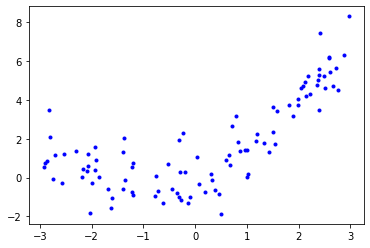

In [0]:
import numpy as np
import matplotlib.pyplot as plt
m  = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2+X+np.random.randn(m,1)
plt.plot(X,y,"b.")


이 데이터는 직선에 어울리지 않을 것입니다. 

그렇기에 PolynomialFeatures를 모델을 활용해 훈련시켜 보겠습니다.

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree = 2, include_bias= False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
print(lin_reg.intercept_, lin_reg.coef_)
# intercrep = 절편, coef ax + bx^2에서 a와 b를 의미합니다. 순서대로 나옵니다.
# plt.plot(lin_reg)



[0.05767246] [[0.90553333 0.48445046]]


추정된 값은 
>y = 0.49439X^2 + 0.98630X + 0.00561187
입니다.

어느정도 비슷하게 나온거 같으니 확인을 위해 출력해 보겠습니다.




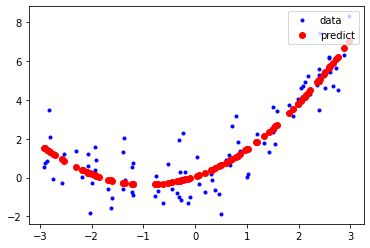

In [0]:
plt.plot(X,y,"b.",label = 'data')
plt.plot(X,lin_reg.predict(X_poly),"ro",label = "predict")
plt.legend(loc = "upper right")

#4.4학습곡선

일반적으로 고차 다항 회귀를 하면 훨씬 더 훈련데이터에 잘 맞추려  할 것입니다.



In [0]:

poly_features_degree1 = PolynomialFeatures(degree= 1 , include_bias= False)
X_poly_1 = poly_features_degree1.fit_transform(X)
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_poly_1,y)


#책에는 300으로 되어 있지만 이 값을 predict하면 직선이 나와 낮추어 진행합니다.
poly_features_degree30 = PolynomialFeatures(degree= 30 , include_bias= False)
X_poly_30 = poly_features_degree30.fit_transform(X)
lin_reg_30 = LinearRegression()
lin_reg_30.fit(X_poly_30,y)
# print(lin_reg_30.intercept_,lin_reg_30.coef_)
# print(lin_reg.predict(X_poly).shape)
# print(lin_reg_30.predict(X_poly_30).shape)
# print(lin_reg_1.predict(X_poly_1).shape)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(-3.0, 3.0, -5.0, 14.0)

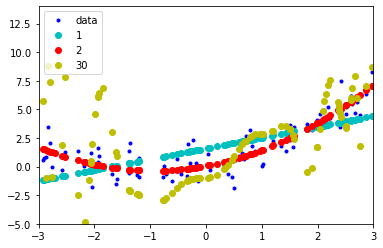

In [0]:
plt.plot(X,y,"b.",label = 'data')
plt.plot(X,lin_reg_1.predict(X_poly_1),"co",label = "1")
plt.plot(X,lin_reg.predict(X_poly),"ro",label = "2")
plt.plot(X,lin_reg_30.predict(X_poly_30),"yo",label = "30")
plt.legend(loc = "upper left")
plt.axis([-3,3 ,-5,14])


위처럼  degree가 1인 경우 직선이기에 맞지 않는 과소적합하게 값이 나왔습니다. 

30의 경우 값을 향하긴하지만 구불구불하게 나오므로 과대적합합니다.

위의 경우 degree가 2인 경우가 가장 적절하게 나왔습니다. 2차함수를 넣었기에  당연한 결과 입니다.

이제 모델이 과대적합한지 또는 과소적합한지 알아야합니다. 방법은 다음과 같습니다.

1. 2장에서 교차검증을 통해 성능은 좋지만 교차검증점수가 낮으면 과대적합하다 표현했고 둘다 점수가 낮으면 과소 적합하다. 표현했습니다.

2. **학습 곡선**을 살펴보는것입니다. 훈련세트와 검증세트의 모델 성능을 훈련세트 크기의 함수로 나타냅니다.


학습곡선을 만들어 보겠습니다.


In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train , X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth = 3 ,label = "val") 
    plt.legend(loc = "upper right")
    plt.xlabel("train size")
    plt.ylabel("RMSE")


선형 회귀모델을 넣어서 성능을 확인해 보겠습니다.

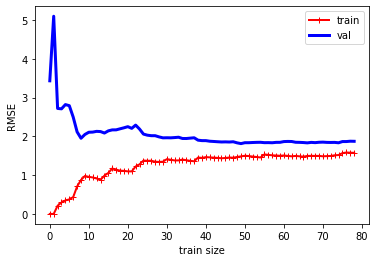

In [0]:
lin_reg_error = LinearRegression()#선형 회귀모델입니다.
plot_learning_curves(lin_reg_error,X,y)


이 경우 0,1의 오차(RMSE)는 매우 작습니다. 세트가 0, 1개이므로 당연한 결과 입니다.

하지만 20개부터 평평해지는 구간이 존재합니다.
 
 이때부터는 훈련세트의 개수는 중요하지 않습니다. 

 이 경우 20개부터 RSME가 2로 꽤 높게 유지하고 있기 때문에 과소적합된 모델입니다. 


 다른경우도 살펴보겠습니다.

(0.0, 3.0)

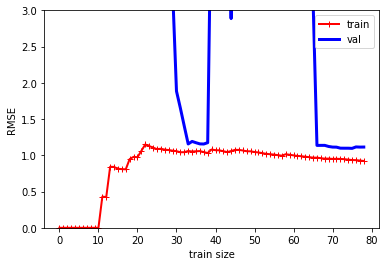

In [0]:
from sklearn.pipeline import Pipeline

polynomal_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree= 10, include_bias= False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomal_regression,X,y)
plt.ylim(0,3)

위의 그래프는 방금 전 그래프와 다르게 10개이후 부터 가까워 지기 시작합니다.

또한 이번에는 30개즈음 부터 평평해 지고 RSME가 1일때 입니다.

즉 위의 선형 회귀식보다는 훨씬 좋은 경우입니다. 

하지만 80개에 가까워지면서 두 곡선 사이에 공간이 생겼습니다.

즉 훈련세트와 검증 세트간의 차이가 생긴다는 것이고 이는 과대 적합하다는 의미가 됩니다.



(0.0, 2.0)

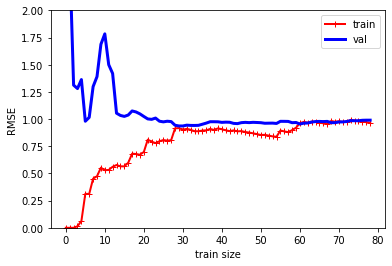

In [0]:
polynomal_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree= 2, include_bias= False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomal_regression,X,y)
plt.ylim(0,2)


degree가 2 즉 2차함수로로 했을때는 훈련세트 10개부터 계속하여 선이 1에 위치에서 붙어있는 것을 볼수 있습니다.

위 같은 경우가 가장 적절한 모델이라 판단할수 있습니다.

#4.5 규제가 있는 선형모델



##4.5.1 릿지 회귀

릿지(ridge)회귀 는 규제가 추가된 선형회귀 버전입니다 . 

규제항 \\(\alpha \sum_{i=1}^n\theta_i^2 \\) 이 추가 됩니다.

즉 원래 비용함수였던 \\(j(\theta) = MSE(\theta)\\)에서

\\(j(\theta) = MSE(\theta)+\alpha {1\over2}\sum_{i=1}^n\theta_i^2\\) 로 변하게 됩니다.

이를 통해서 모델의 가중치를 가능한 작게 유지되도록 노력합니다.

여기서 \\(\alpha\\)의 크기에 따라 \\(\alpha=0\\)이면 선형회귀아 같고 

\\(\alpha\\)가 커지면 값은 점점 데이터의 평균을 지나는 수평선이 됩니다.

이때 정규방정식에 릿지회귀를 적용시키면

\\(\hat{\theta} = (X^{-t}X+\alpha A)^{-1}X^{-T}y  \\)가 됩니다.

A는 왼쪽위가 0이고 (n+1)*(n+1)인 단위행렬입니다.

(100, 100)


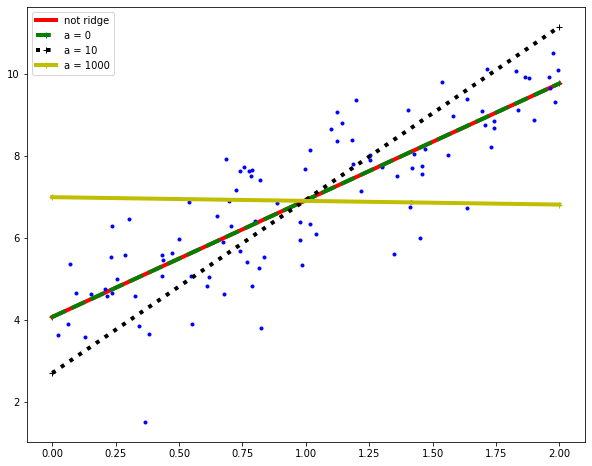

In [0]:

plt.figure(figsize=(10,8))


X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

X_b = np.c_[np.ones((100,1)),X]
print(X_b.dot(X_b.T).shape)

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
#원래의 정규 방정식

X_new = np.array([[0],[2]])
# print(X_new,X)
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new,y_predict,"r-", label = "not ridge",linewidth = 4)
plt.plot(X,y,"b.")

a = 0
A = np.eye(2)
A[0][0] = 0
theta_best_ridge = np.linalg.inv(X_b.T.dot(X_b)-a*A).dot(X_b.T).dot(y)
#원래의 정규 방정식
y_predict = X_new_b.dot(theta_best_ridge)
plt.plot(X_new,y_predict,"g--+",label = "a = 0",linewidth = 4)



a = 10
theta_best_ridge = np.linalg.inv(X_b.T.dot(X_b)-a*A).dot(X_b.T).dot(y)
#원래의 정규 방정식

y_predict = X_new_b.dot(theta_best_ridge)
plt.plot(X_new,y_predict,"k:+",label = "a = 10",linewidth = 4)


a = 1000
theta_best_ridge = np.linalg.inv(X_b.T.dot(X_b)-a*A).dot(X_b.T).dot(y)
#원래의 정규 방정식

y_predict = X_new_b.dot(theta_best_ridge)
plt.plot(X_new,y_predict,"y-+",label = "a = 1000",linewidth = 4)
plt.legend(loc = "upper left")

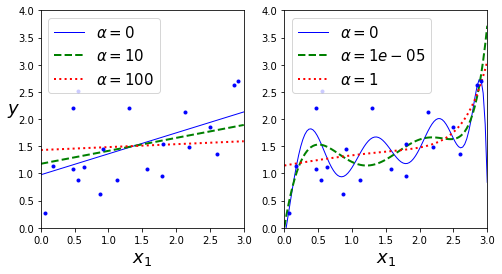

In [0]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

# save_fig("ridge_regression_plot")
plt.show()


위의 오른쪽 그림이 다항회귀의 경우 \\(\alpha\\)의 값에 따른 변화 입니다.
이제 이것을 sklearn에 있는것을 이용하여 사용하면

In [0]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 1,solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [0]:
from sklearn.linear_model import SGDRegressor
sgd_reg  = SGDRegressor(penalty= "l2")
#sgd가 비용함수에 가중치 백터의 l2노름의 제곱을 2로 나눈 규제항을 추가해 릿지회귀와 같게 만들수 있습니다.
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

위에 나온 2개의 값을 그래프에서 확인해보면 꽤 근접한 값에 있는것을 확인할수 있습니다.

##4.5.2 라쏘 회귀
Least Absoulte Shrinkage and Seletion Operator(Lasso)회귀는 선형회귀의 또 다른 버전입니다.

릿지함수와 비슷하지만 규제항에서 제곱을한뒤 2로 나누는것이 아닌 l1노름을사용합니다

\\(j(\theta)  = MSE(\theta) + \alpha \sum_{i=1}^n |\theta_i|\\)

가 라쏘회귀의 비용함수가 됩니다.

라쏘 회귀를 적용시키면
밑의 그래프가 나오게 됩니다. 

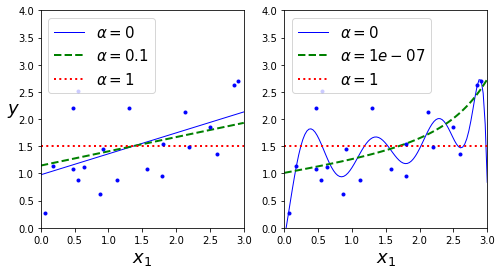

In [0]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

# save_fig("lasso_regression_plot")
plt.show()




이때 오른쪽 다항회귀에 적용된 그래프를 보면

\\(\alpha\\)가 1e-07일때 회귀곡선이 원래 회귀곡선은 다차항을 가진 함수였지만

2차함수처럼 약한 곡선을 그리는 함수로 그려지게 되는것을 볼수 있습니다.

즉 라쏘회귀를 이용하여 \\(\alpha\\)의 값을 높이게 되면

차수가 높은 다항특성의 가중치가 작아지게 되고 특성을 선택하게 되어

희소 모델을 만듭니다.

이를 두곳에 두고 비교해서 보면 더 확실하게 알수 있습니다.

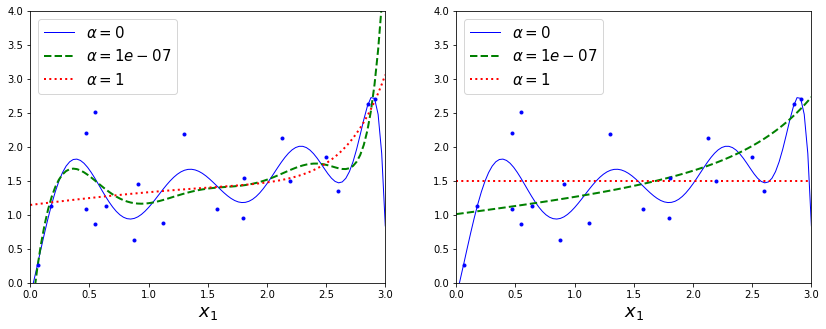

In [0]:
plt.figure(figsize = (14,5))
plt.subplot(121)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)


In [0]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# 편향은 무시
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
# print(t1,t2)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

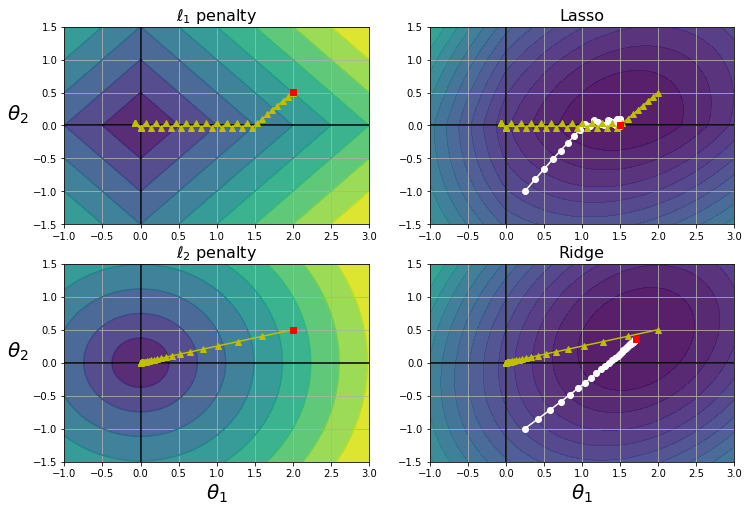

In [0]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    # print(levelsN)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, N, levels=levelsN, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    # plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(-path_N[:, 1]*2, path_N[:, 0 ]*2, "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0, labelpad=15)
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(-path_N[:, 1]*2, path_N[:, 0 ]*2, "y-^")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)


# save_fig("lasso_vs_ridge_plot")
plt.show()

두축은 각기 다른 손실함수를 나타냅니다. $\ell_1$손실 $(|\theta_1|+|\theta_2|)$ 를 나타냅니다. 축에 가까워지면서 선형적으로 줄어듭니다.

시작점을 2 , 0.5(빨간점)으로 두고 시작하면 $\theta_2$는 선형적으로 0으로 감소합니다.(진행 방향은 0으로 가까워지는  방향입니다)

 $\theta_2$가 0이된 이후  $\theta_1$은 아직 0이 아니므로 계속 줄어들어 0이 될것입니다.

 오른쪽위의 그림은 Lasso함수의 손실함수$(MSE(\theta)+\ell_1)$를 나타냅니다. 

초기화 위치는  $\theta_1$ = 0.25 ,  $\theta_2$ = 0=-1으로 왼쪽밑의 하안점부터 시작하여 최적화 되는것을 그리고 있습니다. 

여기서도  $\theta_2$는 빠르게 줄어들은뒤  $\theta_1$이 최적화 됩니다.

밑의 2그래프는 Lasso함수가 아닌 ridge함수를 이용하는것입니다.  왼쪽 밑은 $\ell_2$ 패널티를 사용하여 경사하강법을 사용하여 최적화 되는과정을 보여주고 있고

오른쪽 밑 그래프는 릿지회귀의 손실함수$(MSE(\theta)+\ell_2)$를 나타냅니다.



여기서 $\alpha$를 증가하면 붉은 점(최적점)이 노란선을 따라 왼쪽으로 이동하고 감소하면 오른쪽으로 이동하게 됩니다.

밑에 실제로 코드를 작성하여 실행하면




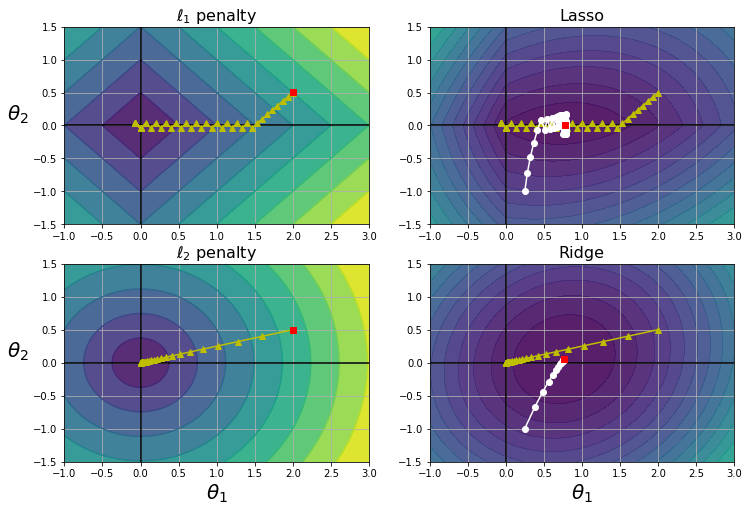

In [0]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 1.5, 0, "Lasso"), (1, N2, 0,  1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    # print(levelsN)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, N, levels=levelsN, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    # plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(-path_N[:, 1]*2, path_N[:, 0 ]*2, "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0, labelpad=15)
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(-path_N[:, 1]*2, path_N[:, 0 ]*2, "y-^")
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)


# save_fig("lasso_vs_ridge_plot")
plt.show()

이처럼 바뀌는것을 알수 있습니다.

여기서 감안해야하는 것이 라쏘함수의 경우 $\theta_i = 0$ 인구간에서 미분이 불가능하다는 점입니다. 

이 점을 해결하기위해 subgradient vector  'g' 가 존재합니다. 

이 백터의 공식은 

$g(\theta,j) = \nabla_\theta MSE(\theta) + \alpha
\begin{pmatrix} 
    sign(\theta_1) \\
    sign(\theta_2) \\
    ...\\
    sign(\theta_n) \\
\end{pmatrix}
$ 
$sign(\theta_i) = \begin{matrix}
    -1 \ \ \theta_i <0일때\\
    \ \ \ 0  \ \ \theta_i = 0일때\\
    +1 \ \ \theta_i > 0 일때 
\end{matrix}$

##4.5.3 엘라스틱넷

릿지 회귀와 라쏘 회귀를 정충한 모델입니다.

식은 
\\(\ \ \ \ j(\theta)  = MSE(\theta) +r \alpha \sum_{i=1}^n |\theta_i|+ \alpha {1-r \over 2} \sum_{i=1}^n \theta_i^2 \\) 이며

r을 조절하여 혼합정도를 정할수 있습니다.

보통의 선형회귀(규제X), 릿지, 라쏘, 엘라스틱넷을 언제 사용해야 하는가

1. 일반적으로 보통의 선형회귀보다 규제가 약간 있는것이 좋습니다.
2. 릿지를 기본으로 사용하지만 만약 쓰이지 않는 특성이 많은것 같다면 <br> 라쏘나 엘라스틱을 사용하는것이 좋습니다.
3. 다만 라쏘의 경우 특성수가 훈련샘플보다 많거나 특성 몇개가 강하게 연결됬다면 <br>문제가 발생하므로 엘라스틱을 선호합니다.

다음은 엘라스틱의 예제입니다.




In [0]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1,l1_ratio = 0.5)#l1과 l2의 비율은 절반
elastic_net.fit(X,y)

print(elastic_net.predict([[1.5]]))

[1.54333232]


##4.5.4 조기종료
경사하강법같은 반복 학습알고리즘을 규제하는 방법중 색다른 것이 검증에러가 최소값에 도달하면

훈련을 종료시키는 것으로 이를 **조기종료**라 합니다.

![대체 텍스트](https://wikidocs.net/images/page/28147/0.png)

화살표의 위치가 가장 적절한 훈련 상태입니다.

이를 코드로 구현하면


In [0]:
from sklearn.base import  clone


poly_scaler = Pipeline([
    ("poly_featuers",PolynomialFeatures(degree= 90,include_bias=False)),
    ("std_scaler",StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol= -np.infty, warm_start= True,
                       penalty= None, learning_rate="constant",eta0= 0.0005)
minimun_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_predict)
    if(val_error < minimun_val_error):
        minimun_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [0]:
print(best_epoch,best_model)

256 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)


책에 있는 코드이지만 **조기 종료**라는 이름을 붙인것과는 달리 최적의 모델을 찾기만 하지 <br>멈추지 않기 때문에 그다지 좋은 코드처럼 보이지는 않습니다.

#4.6 로지스틱 회귀

회귀 알고리즘을 분류로 사용하는 대표적인 예로 사용됩니다.



##4.6.1 확률 추정

선형회귀모델과 같이 입력 특성의 가중치합과 편향을 계산합니다. 

대신 선형모델과는 다르게 결과가 바로 출력되는 것이 아닌 로지스틱(logistic)을 출력합니다.

$\hat{p} = h_\theta(x) = \sigma(\theta^Tx)$

여기서 로지스틱($\sigma(\cdot)$)는 시그모이드 함수입니다.

시그모이드란 $\sigma(\cdot) = {1 \over 1+e^{-t}}$입니다.

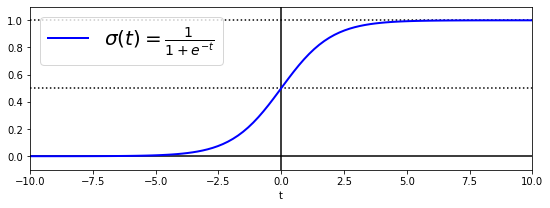

In [0]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
# save_fig("logistic_function_plot")
plt.show()

샘플 x가 양성클래스에 속할 확률

$\hat{p} = h_\theta(x)$를 추정하면 쉽게 예측할수 있습니다.

$\hat{y} $는 $\hat{p} $가 0.5보다 작으면 0 크거나 같으면 1로 예측할수 있고

이를 t로 보면 $t < 0$ 일때 $\sigma(t) < 0.5$ 이므로 

$\theta^Tx$가 양수면 1 음수면 0으로 예측할수 있습니다.

##4.6.2 훈련과 비용함수

로지스틱함수의 비용함수

$c(\theta) = \begin{matrix}
    -log(\hat{p}) \ \ \ \ \ \ \ \ \ \ \  \ \  y = 1일때 \\
    -log(1-\hat{p}) \ \ \ \ y = 0일때
\end{matrix}$

이 비용함수는 t가 0에 가까워지면 -log(t)가 커지므로 타당하다.

반대로 t가 1에 가까워지면 -log(t)는 0에 가까워진다. 

이를 토대로 비용함수를 다시 만들어보면

$j(\theta) = {1 \over m} \sum_{i=1}^m [y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)}]$

위의 식을 도출해 낼수 있습니다. 

위 함수는 정규방정식 처럼 최솟값을 계산하는 알려진 해가 없습니다. <br>하지만 경사하강법으로 전역 최솟값을 찾는것은 보장합니다.

이 비용 함수의 j번째 모델 파라미터 $\theta_j$에 대해 편미분 한 식은 다음과 같습니다.


${\partial \over \partial\theta_j}J(\theta) = {1 \over m}\sum_{i=1}^m(\sigma(\theta^TX^{(i)})-y^{(i)})x_j^{(i)}$

이식은 BGD에서 사용되는 비용함수와 매우 비슷합니다. BGD처럼 오차를 계산하고 특성값을 곱해서 모든 훈련샘플의 평균을 구합니다. 

모든 편도함수를 포함한 그래디언트 백터를 만들면 BGD를 사용할수 있습니다.




##4.6.3 결정경계

설명을 위해 sklearn에서 붓꽃 데이터 셋을 사용하겠습니다.

데이터셋 내에는 Iris-setosa, Iris-versicolor, Iris-Virginica에 속하는 150개의 꽃잎과 꽃받침의 너비와 길이를 담고있습니다.



In [0]:
from sklearn import datasets

iris = datasets.load_iris()
print(list(iris.keys()))

X = iris["data"][:,3:]
y = (iris["target"] == 2).astype(np.int)

print(X.shape, y.shape)


['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
(150, 1) (150,)


In [0]:
X, y

(array([[0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.4],
        [0.3],
        [0.2],
        [0.2],
        [0.1],
        [0.2],
        [0.2],
        [0.1],
        [0.1],
        [0.2],
        [0.4],
        [0.4],
        [0.3],
        [0.3],
        [0.3],
        [0.2],
        [0.4],
        [0.2],
        [0.5],
        [0.2],
        [0.2],
        [0.4],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.4],
        [0.1],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.1],
        [0.2],
        [0.2],
        [0.3],
        [0.3],
        [0.2],
        [0.6],
        [0.4],
        [0.3],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [1.4],
        [1.5],
        [1.5],
        [1.3],
        [1.5],
        [1.3],
        [1.6],
        [1. ],
        [1.3],
        [1.4],
        [1. ],
        [1.5],
        [1. ],
        [1.4],
        [1.3],
        [1.4],
        [1

로지스틱 모델로 훈련시키겠습니다.

In [0]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

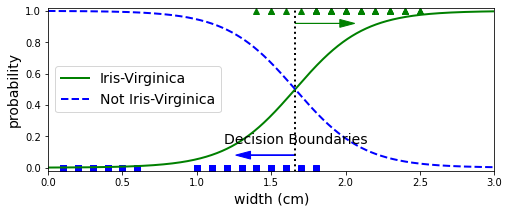

In [0]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision Boundaries ", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("width (cm)", fontsize=14)
plt.ylabel("probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

Iris-virginica의 꽃잎의 너비는 1.4~2.5cm에 분포합니다.

다른 꽃잎들은 virginica보다는 작지만 0.1~1.8cm사이에 분포합니다. 그래서 약간은 중첩이 되는 구간이 있습니다.

하지만 분류기는 2cm이상의 꽃은 전부 virginica라고 확신하는것을 그래프상에서 볼수 있습니다.

반대로 1cm이하는 아니라고 확신합니다.

1.6cm부근에서 맞는지 아닌지에 대한 확률이 50%가 되고 바로 이부분이 결정경계가 됩니다. 

1.6정도보다 크면 virginca가 맞다라 예측값을 출력할것이며 작다면 아니라고 출력할 것입니다.

In [0]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

1.7일때 예측값 1 은 virginica가 맞다 출력한것이고
0은 틀리다 라고 출력한것입니다.


In [0]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)


In [0]:
X.shape,y.shape

((150, 2), (150,))

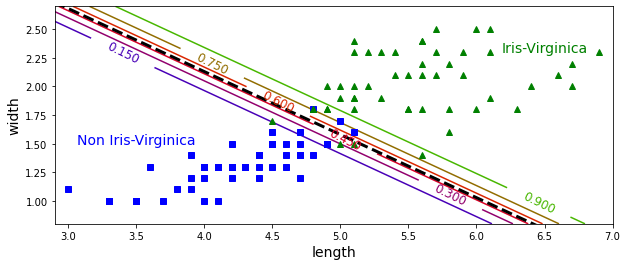

In [0]:

log_reg = LogisticRegression(solver='liblinear', C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Non Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("length", fontsize=14)
plt.ylabel("width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

#4.6.4 소프트 맥스 회귀

로지스틱 회귀모델을 여러개의 이진분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 

일반화 하는것으로 다항 로지스틱회귀라고도 한다

샘플 x가 주어지면.각 클래스 k에 대해 $s_k(x)$를 계산하고 그 점수를 소프트맥스 함수에 적용하여 클래스의 확률을 추정한다.

이를수식화 하면

$s_k(x) = (\theta)^{(k)})^Tx$
가 됩니다.

각 클래스는 자신만의 파라미터 백터 $\theta^{(k)}$가 있고 이는 
파라미터행렬($\Theta$)에 저장됩니다.


이를 이용해 $\hat{p}$를 추정할수 있스니다.

K = 클래스 수

>$\hat{p}_k = \sigma(s(x))_k = {e^{(s_k(x))} \over {\sum_{j=1}^K e^{(s_j(x))}} }$ 


가됩니다.

이때 추정확률이 가장 높은 클래스를 선택합니다.

>$\hat{y} = argmax \sigma (s(x))_k = argmax s_k(x) = argmax((\theta^{(k)})^Tx) $

여기서 argmax 란 배열(백터)에서 가장 큰 값을 리턴해줍니다.

 즉 $\ \sigma(s(x))_k \  ,s_k \ ,(\theta^{(k)})^Tx $의 값들중에서 가장 큰 값을 반환합니다.


이제 비용함수를 알아봐야 합니다. 소프트맥스의 경우 여러클래스가 속하기 때문에 크로스 엔트로피 라는 비용함수를 사용하는것이 적절합니다.


* 엔트로피란 불확실성의 척도로 예측값을 얼마나 확실하게 뽑을수 있는지 볼수있는 지표 입니다. 

* 예측 모형은 실제 분포인 q 를 모르고, 모델링을 하여 q 분포를 예측하고자 하는 것입니다. 예측 모델링을 통해 구한 분포를 p(x) 라고 할 때 실제 분포인 q를 예측하는 p 분포를 만든다면 이 때 cross-entropy 는 아래와 같이 정의됩니다.

>>$H(p,q) = -\sum_x p(x)log(q(x))$

* 이때 p,q 둘다 식에 들어가므로 cross entropy라 이름을 붙이게 됩니다.

* 우리는 예측 모형을 만들때 실제 분포 또한 갖고 있기 때문에 이를 계산할수 있고 이를 통해 실제값과 예측값의 차이(비용함수)를 알수 있습니다.

이를 통해 비용함수를 만들어 내면

>$j(\Theta) -{1 \over m}\sum_{i=1}^M\sum_{k=1}^Ky_k^{(i)}log(\hat{p}_k^{(i)})$

가 됩니다.

여기서 그레디언트 백터는

> $\nabla_{\theta^{(k)}}J(\Theta) = {1 \over m}\sum_{i=1}^m(\hat{p}_k^{(i)}-y_k^{(i)})x^{(i)}$

입니다.

그레디언트 백터까지 얻었으니 이를 구현하기위해 sklearn을 사용하면


In [0]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

sklearn에서 소프트맥스는 로지스틱에서 multi_class = "multinomial"를 매개변수로 주고 

solver = "ibfgs"와 같은 소프트 맥스 알고리즘을 지정해주어야 합니다.




In [0]:
softmax_reg.predict([[5,2]])

array([2])

In [0]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

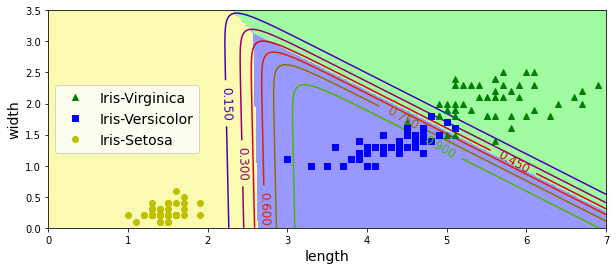

In [0]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("length", fontsize=14)
plt.ylabel("width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

여기서 보이는 숫자 0.15, 0.300, 0.600은 해당값이 Iris-versicolor클래스일 확률을 의미합니다.

#4.7 연습문제



1.수백만개의 특성을 가진 훈련세트에서는 어떤 선형 회귀 알고리즘을 사용할수 있을까요? 

>특성이 매우 많기 때문에 정규방정식과 SVD는 사용하기 힘들 것입니다. 그렇기에 경사하강법을 사용해야하며 SGD,BGD, MiniBatch 중에 BGD의 경우 메모리가 된다면 어느것을 사용해도 문제가 없을 것입니다.

2. 훈련세트에 있는 특성들이 각기 아주 다른 스케일을 가지고 있습니다. 이런 데이터에 잘 작동하지 않는 알고리즘은 무엇일까요? 그 이유는 무엇일까요? 이 문제를 어떻게 해결할수 있을까요? 

> 경사하강법 계열의 알고리즘은 수렴하는데 오랜 시간이 걸릴것입니다. 이를 해결하려면 훈련전에 전처리과정에서 스케일을 통해 조절해야합니다. 혹은 규제항을 추가하여 가중치가 일정이상 커지지 못하게 하기에 더 빠르게 수렴할수 있습니다.

3. 경사하강법으로 로지스틱 회귀모델을 훈련시킬때 지역 최솟값에 갇힐 가능성이 있을까요? 

> 로지스틱모델은 볼록함수이기에 함수의 두점을 연결한 직선이 함수의 곡선과 만날수 없으므로 지역최솟값에 갇히지 않습니다.

4. 충분히 오랫동안 실행하면 모든 경사 하강법 알고리즘이 같은 모델을 만들어 낼까요? 

> 볼록함수이며 학습률이 너무 크지 않는다는 가정하에 같은 모델을 만들수는 있습니다. 하지만 SGD와 Mini Batch에서 학습률을 감소시키지 않고 계속 한다면 최적값에 수렴하지 못할수 있습니다.

##5. 배치 경사하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타내밨습니다. 검증오차가 일정하게 상승되고 있다면 어떤일이 일어나고 있는 걸까요? 이 문제를 어떠게 해결 할수 있나요?

> 2가지로 나누어 볼수 있습니다. 훈련에러가 같이 일정하게 올라간다면 학습률이 너무 높은 상태인 것으로 학습률을 낮춰야 합니다.<br> 혹은 훈련에러는 변함없지만 검증 오차만 상승한다면 과대 적합이므로 훈련을 종료시켜야 합니다.

6. 검증오차가 상승하면 미니배치 경사 하강법을 즉시 중단하는것이 좋은 방법인가요?

> 즉시 중단하는것은 좋지 않습니다. 맨 처음했을때 보다 바로 직후에 오차가 더 클수도 있기 때문에 최적의 상태를 발견하면 저장을 해두고 갱신을 진행하면서 오랫동안 진전이 없는 상태가 되면 그 상태를 모델로 복원하는것이 좋은 방법입니다.

7. 경사하강법중 어느것이 제일 빠르게 최적 솔루션 주변에 도달할까요? 실제로 수렴하는것은 어떤것일까요? 다른 방법들도 수렴하게 만들수 있나요? 

> SGD가 가장 빠르게 도달하지만 수렴하는것은 BGD 일것입니다. 점진적으로 학습률을 낮추면서 진행한다면 모든 경사하강법이 수렴하게 만들수 있습니다.


##8. 다항회귀를 사용했을 때 학습 곡선을 보니 훈련오차와 검증 오차 사이에 간격이 큽니다. 무슨 일이 생긴 걸까요? 이 문제를 해결하는 3가지 방법은 무엇인가요?

> 과대적합이 생긴것일 겁니다. 이경우 해결방법은 <br> 1. 다항 차수를 낮추는것입니다. <br>2. 모델에 규제를 더하는 것 입니다. <br>3.훈련세트의 크기를 증가시키는 것입니다. 

##9. 릿지 회귀를 사용했을 때 훈련 오차와 검증 오차가 거의 비슷하고 둘다 높았습니다. 이 모델에는 높은 편향이 문제인가요 아니면 높은 분산이 문제인가요 규제 하이퍼파라미터 $\alpha$를 증가시켜야할까요 줄여야 할까요

> 혼련 오차와 검증 오차가 비슷하게 높은 상황은 과소 적합일 확률이 높습니다. 과소 적합의 경우 규제가 너무 강하여 편향이 높기때문에 생기므로 $\alpha$를 감소시켜야 합니다.


10. 다음과 같이 사용햐아 하는 이유는? 

* 평범한 선형회귀(규제가 없는 모델) 대신 릿지회귀
* 릿지 회귀 대신 라쏘 회귀
* 라쏘 회귀 대신 엘라스틱넷

> 선형->릿지의 경우 일반적으로 선형보다 릿지가 더 성능이 좋기에 릿지를 사용하는것이 좋습니다. 꼭 사용해야하는 경우는 특성들의 스케일이 다 달라 수렴속도가 늦다면 사용하는것이 좋습니다. <br>릿지 -> 라쏘 의 경우 필요없는 특성이 많은것이 보인다면 필요없는 특성을 제거하는 특징을 가진 라쏘를 사용하는것이 더 효율적입니다. <br> 라쏘의 경우 특성으 제거하기 때문에 특성 몇가지가 강하게 연결되있거나 샘플보다 특성이 많은경우 불규칙하게 작동하기에 엘라스틱을 사용하는것이 더 효율적입니다.

11. 사진을 낮과 밤, 실내와 실외로 분류하려 합니다. 두개의 로지스틱 회귀분류기를 만들어야할까요. 아니면 하나의 소프트 맥스 회귀 분류기를 만들어야 할까요? 

> 낮과 밤으로 분류하는것과 실내, 실외를 분류하는것이 연관이 없으므로 두개의 로지스틱 회귀분류기를 만드는것이 더 효율적입니다.








12. 조기종료를 사용한 배치 경사하강법으로 소프트 맥스 회귀를 사이킷런없이 구현해 보세요.


In [121]:
#데이터 가져오기
import random
np.random.seed(2020)
X = iris["data"][:,(2,3)]
y = iris["target"].astype(np.int)
# print(X)
tmp = np.c_[X,y]
tmp = tmp.tolist()
# print(tmp[:10])
random.shuffle(tmp)
# print(tmp[:10])

X_with_bias = np.c_[np.ones([len(X), 1]), X]

# X = []
# y = []
# for t in tmp:
#     X.append(t[:2])
#     y.append(t[-1])
# X = np.array(X)
# y = np.array(y)
# print(X)

#train데이터 , val데이터,test 데이터 나누기

test_ratio = 0.15
val_ratio = 0.2

# print(len(X))
test_len = int(test_ratio*len(X))
val_len = int(val_ratio*len(X))


test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

rnd_indices = np.random.permutation(total_size)
test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_val= X_with_bias[rnd_indices[train_size:-test_size]]
y_val= y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]
print(X_test.shape,X_val.shape,X_train.shape)

(30, 3) (30, 3) (90, 3)


값을 3가지로 분류해야 하므로 argmax를 만듭니다.(1개만 1이고 나머지가 0인 백터)

In [0]:

def argmax(y):
    column = max(y)+1
    row = len(y)

    value = np.zeros((row,int(column)))
    for x in range(row):
        value[x][int(y[x])] = 1
    # print(value)
    return value
        
y = [1,2,0,1,2,0,0,1,2]

argmax(y)
y_train_argmax = argmax(y_train)
y_val_argmax = argmax(y_val)
y_test_argmax = argmax(y_test)


소프트맥스의 일부를 구현하비다(s_k는 나중에)

In [0]:
def softmax(s_k):
    exp = np.exp(s_k)
    sigma_exp = np.sum(exp,axis = 1,keepdims=True)
    return exp/sigma_exp


$J(\mathbf{\Theta}) =\dfrac{1}{m}\sum\limits{i=1}^{m}\sum\limits{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$
그리고 그래디언트 공식입니다:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

$\hat{p}_k^{(i)} = 0$이면 $\log\left(\hat{p}_k^{(i)}\right)$를 계산할 수 없습니다. nan 값을 피하기 위해 $\log\left(\hat{p}_k^{(i)}\right)$에 아주 작은 값 $\epsilon$을 추가하겠습니다.

In [124]:
eta = 0.1
n_iter = 5000
m = len(X_train)
epsilon = 1e-7

n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))   # == 3 (3개의 붓꽃 클래스)

theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iter):
    s_k = X_train.dot(theta)
    y_proba = softmax(s_k)
    # print(y_proba.shape)
    loss = -np.mean(np.sum(y_train_argmax*np.log(y_proba+epsilon),axis = 1))
    error = y_proba - y_train_argmax
    if(iteration %500 == 0):
        print(iteration, loss)
    gradient = 1/m*X_train.T.dot(error)
    theta = theta- eta*gradient


0 3.0367774732258193
500 0.3756568974650402
1000 0.30165201580695444
1500 0.26168958910763046
2000 0.23524448749458726
2500 0.2160909379858551
3000 0.2014460120777059
3500 0.18981967522331036
4000 0.18032644297209383
4500 0.1724023470982891


In [125]:
theta

array([[ 8.31284873,  0.74531768, -9.47106562],
       [-1.03490841,  1.16121184,  1.69198423],
       [-2.433702  ,  0.0431294 ,  4.66326754]])

In [126]:
logit = X_val.dot(theta)
y_proba = softmax(logit)             
y_predict = np.argmax(y_proba,axis =1)


accuracy_score = np.mean(y_predict == y_val)
accuracy_score

1.0

In [127]:

alpha = 0.1  # 규제 하이퍼파라미터
Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iter):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_train_argmax * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - y_train_argmax
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients




0 2.4601736319723866
500 0.5191244329311085
1000 0.4955790499169414
1500 0.4888003079610119
2000 0.4863056051935095
2500 0.4853074105342423
3000 0.4848908815049524
3500 0.48471283842271173
4000 0.4846356124457092
4500 0.48460180569295797


In [128]:
logits = X_val.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

0.9666666666666667

In [136]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_train_argmax * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - y_train_argmax
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_val.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_val_argmax * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 1.0038151019518136
500 0.5680121273081649
1000 0.5536169449755529
1500 0.5484970758001898
2000 0.54639980606965
2500 0.5454791054895858
3000 0.5450523470058172
3500 0.5448443816486757
4000 0.544737951872409
4500 0.544680809443091
5000 0.5446487073360929


In [137]:
logits = X_val.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score


0.9666666666666667